In [660]:
#패키지 불러오기
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import  linear_model
from sklearn import  preprocessing
from pandas.plotting import scatter_matrix

#데이터 프레임 정의
df_data = pd.read_csv('./Boston_data/train.csv', header = 'infer')
sample_df = pd.read_csv('./Boston_data/sample_submission.csv', header = 'infer')
test_df = pd.read_csv('./Boston_data/test.csv', header = 'infer') 

In [661]:
# Y값 따로 정리
target_df = df_data['SalePrice'] 
del df_data['SalePrice']

In [662]:
df_data.shape  , sample_df.shape, test_df.shape

((1460, 80), (1459, 2), (1459, 80))

In [663]:
all_df = pd.concat([df_data, test_df]) # .sort_values(ascending=False) .sum()

In [664]:
all_df.shape

(2919, 80)

In [665]:
# 결측률 측정
((all_df.isnull().sum() / all_df.isnull().count())*100).sort_values(ascending=False).head()

PoolQC         99.657417
MiscFeature    96.402878
Alley          93.216855
Fence          80.438506
FireplaceQu    48.646797
dtype: float64

In [666]:
# df_data 내에 목표치인 'SalePrice'과 단순 인덱스인 'Id' 그리고 nan 값이 너무 컸던 컬럼 제거
del all_df['Id']
del all_df['PoolQC']
del all_df['MiscFeature']
del all_df['Alley']
del all_df['Fence']
del all_df['FireplaceQu']

In [667]:
## 오브젝트형태의 데이터와 아닌 데이터를 분류하여 결측치 별개 처리 // 각 평균, 최빈값은 각기 missing_values 딕셔너리에 저장하여 보관

missing_values = {} 
for column_name in all_df.columns:
    if all_df[column_name].dtypes == "object":
        mode_value = all_df[column_name].value_counts()[0]    #  오브젝트 데이터이기 때문에 해당 컬럼의 최빈값으로 편성
        missing_values[column_name] = mode_value
        all_df[column_name] = all_df[column_name].fillna(mode_value)
    else:
        mean_value = all_df[column_name].mean()  #수치기 떄문에 해당 컬럼의 평균값으로 대체
        missing_values[column_name] = mean_value
        all_df[column_name] = all_df[column_name].fillna(mean_value)

# 추가

In [668]:
def seperate_type(df):
    dtypes = df.dtypes
    numerical = [df.columns[idx] for idx, _ in enumerate(dtypes) if dtypes[idx] != object]
    category = [df.columns[idx] for idx, _ in enumerate(dtypes) if dtypes[idx] == object]
    
    return numerical, category

numerical_feature = seperate_type(all_df)[0]
category_feature = seperate_type(all_df)[1]

In [669]:
numerical_feature

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [670]:
abs(all_df[numerical_feature].corrwith(target_df)).sort_values(ascending=False)
# 3SsnPorch        0.020964
# BsmtFinSF2       0.017919
# MiscVal          0.011403
# YrSold           0.010297
# BsmtHalfBath     0.004534

OverallQual      0.387199
GrLivArea        0.371790
TotalBsmtSF      0.322925
GarageCars       0.322363
GarageArea       0.320355
1stFlrSF         0.302698
FullBath         0.289523
TotRmsAbvGrd     0.285441
YearBuilt        0.276095
YearRemodAdd     0.262294
Fireplaces       0.255804
GarageYrBlt      0.251269
MasVnrArea       0.230320
BsmtFinSF1       0.195104
LotArea          0.178802
WoodDeckSF       0.171967
LotFrontage      0.170388
2ndFlrSF         0.164464
OpenPorchSF      0.160202
HalfBath         0.151402
BsmtUnfSF        0.128485
BsmtFullBath     0.121601
BedroomAbvGr     0.096905
EnclosedPorch    0.075003
ScreenPorch      0.071186
KitchenAbvGr     0.061826
PoolArea         0.054391
MoSold           0.037384
OverallCond      0.037003
MSSubClass       0.030953
LowQualFinSF     0.024322
3SsnPorch        0.020964
BsmtFinSF2       0.017919
MiscVal          0.011403
YrSold           0.010297
BsmtHalfBath     0.004534
dtype: float64

In [671]:
all_df[['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].head()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,706.0,0.0,150.0,856.0
1,978.0,0.0,284.0,1262.0
2,486.0,0.0,434.0,920.0
3,216.0,0.0,540.0,756.0
4,655.0,0.0,490.0,1145.0


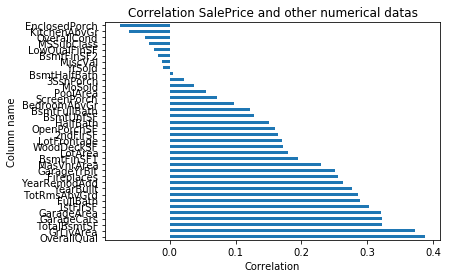

In [672]:
all_df[numerical_feature].corrwith(target_df).sort_values(ascending=False).plot(kind='barh') #barh : 가로로 뻗은 막대그래프
plt.title('Correlation SalePrice and other numerical datas')
plt.ylabel('Column name')
plt.xlabel('Correlation')

plt.show()

In [673]:
# * 1stFlrSF + '2ndFlrSF' -> TotalFlrSF
# * OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch -> TotalPorchSF
# * TotalBsmtSF의 경우 BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF 이므로 BsmtFinSF1, BsmtFinSF2, BsmtUnfSF 삭제

# del all_df['1stFlrSF']
# del all_df['2ndFlrSF']
# del all_df['BsmtFinSF1']
# del all_df['BsmtFinSF2']
# del all_df['BsmtUnfSF']
# del all_df['EnclosedPorch']
# del all_df['OpenPorchSF']
# del all_df['3SsnPorch']
# del all_df['ScreenPorch']

In [674]:
all_df.shape

(2919, 74)

In [675]:
 df_data  target_df

SyntaxError: invalid syntax (<ipython-input-675-ebc2758a7b70>, line 1)

In [676]:
target_df.values

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [677]:
all_df.iloc[:1460].shape , target_df.shape

((1460, 74), (1460,))

In [678]:
test = all_df.iloc[:1460]


In [679]:
# numerical_feature = seperate_type(all_df)[0]
# analysis_data = pd.concat(all_df.iloc[:1460]  , target_df)

analysis_data = pd.concat([test , target_df], axis=1)

In [680]:
analysis_data.shape

(1460, 75)

In [681]:
# numerical_feature = seperate_type(Big_X_copy)[0]
# analysis_data = pd.concat([Big_X_copy[numerical_feature][0:train_df.shape[0]], train_df['SalePrice']], axis=1)
# corr_price_and_other = pd.DataFrame(analysis_data.loc[:,:'Evaluate_Lot'].corrwith(analysis_data['SalePrice']).sort_values(ascending=False),
#                                    columns=['Correlation'])
# sns.heatmap(analysis_data.corr())
# plt.title('Correlation heatmap(Target With Numerical Datas)')
# plt.show()


In [682]:
all_df.loc[:, 'ExterQual'] = all_df.loc[:, 'ExterQual'].replace({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1})
# all_df.loc[:, 'ExterCond'] = all_df.loc[:, 'ExterCond'].replace({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1})
all_df.loc[:, 'BsmtQual'] = all_df.loc[:, 'BsmtQual'].replace({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NE' : 0})
all_df.loc[:, 'BsmtCond'] = all_df.loc[:, 'BsmtCond'].replace({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NE' : 0})
all_df.loc[:, 'HeatingQC'] = all_df.loc[:, 'HeatingQC'].replace({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1})
all_df.loc[:, 'KitchenQual'] = all_df.loc[:, 'KitchenQual'].replace({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1})
# all_df.loc[:, 'FireplaceQu'] = all_df.loc[:, 'FireplaceQu'].replace({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NE' : 0})
all_df.loc[:, 'GarageFinish'] = all_df.loc[:, 'GarageFinish'].replace({'Fin' : 5, 'RFn' : 3, 'Unf' : 1, 'NE' : 0})
all_df.loc[:, 'GarageQual'] = all_df.loc[:, 'GarageQual'].replace({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NE' : 0})
all_df.loc[:, 'GarageCond'] = all_df.loc[:, 'GarageCond'].replace({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NE' : 0})
all_df.loc[:, 'Electrical'] = all_df.loc[:, 'Electrical'].replace({'SBrkr' : 5, 'FuseA' : 4, 'FuseF' : 3, 'Mix': 2, 'FuseP' : 1})
all_df.loc[:, 'LandSlope'] = all_df.loc[:, 'LandSlope'].replace({'Gtl' : 5, 'Mod' : 3, 'Sev' : 1})
all_df.loc[:, 'LandContour'] = all_df.loc[:, 'LandContour'].replace({'Lvl' : 5, 'Bnk' : 3, 'HLS' : 2, 'Low' : 1})
all_df.loc[:, 'BsmtExposure'] = all_df.loc[:, 'BsmtExposure'].replace({'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'NE' : 0 })
all_df.loc[:, 'BsmtFinType1'] = all_df.loc[:, 'BsmtFinType1'].replace({'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3,
                                                                               'LwQ' : 2, 'Unf' : 1, 'NE' : 0})
all_df.loc[:, 'BsmtFinType2'] = all_df.loc[:, 'BsmtFinType2'].replace({'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3,
                                                                               'LwQ' : 2, 'Unf' : 1, 'NE' : 0})
all_df.loc[:, 'LotShape'] = all_df.loc[:, 'LotShape'].replace({'Reg' : 4, 'IR1' : 3, 'IR2' : 2, 'IR3' : 1})

In [683]:
del all_df['ExterCond']
del all_df['OverallCond']
del all_df['LowQualFinSF']
del all_df['MoSold']
del all_df['YrSold']
del all_df['BsmtHalfBath']

In [684]:
numerical_feature = seperate_type(all_df)[0]
category_feature = seperate_type(all_df)[1]

In [685]:
minmax_scale= preprocessing.MinMaxScaler()
OneHot_encode= preprocessing.OneHotEncoder()

In [686]:
A= minmax_scale.fit(all_df[numerical_feature])
# B= OneHot_encode.fit(all_df[category_feature])
# df_minmax = minmax_scale.transform(sum_pd[sum_pd.columns])

In [687]:
minmax = preprocessing.MinMaxScaler()
train_X_mm = minmax.fit_transform(all_df[numerical_feature])
train_X_mm_df = pd.DataFrame(train_X_mm, columns=all_df[numerical_feature].columns, index=all_df[numerical_feature].index)
# train_X_fin = pd.concat([train_X_mm_df, train_X_ca], axis=1)
# train_X_fin.index = range(len(train_X))

In [688]:
minmax_scale_df = pd.DataFrame(A, columns= A.columns, index=train_X_nu.index)
# OneHot_encode_df = pd.DataFrame(B, columns=train_X_nu.columns, index=train_X_nu.index)
# minmax = MinMaxScaler()
# train_X_mm = minmax.fit_transform(train_X_nu)
# train_X_mm_df = pd.DataFrame(train_X_mm, columns=train_X_nu.columns, index=train_X_nu.index)

AttributeError: 'MinMaxScaler' object has no attribute 'columns'

In [689]:
train_X_mm_df.shape, all_df[numerical_feature].shape

((2919, 46), (2919, 46))

In [690]:
all_df = pd.concat([train_X_mm_df  , all_df[numerical_feature]], axis= 1)

In [691]:
numerical_feature

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandContour',
 'LandSlope',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [692]:
all_df['WoodDeckSF'].head()

,WoodDeckSF,WoodDeckSF
0,0.000000,0
1,0.209270,298
2,0.000000,0
3,0.000000,0
4,0.134831,192


In [693]:
OneHot_encode= preprocessing.OneHotEncoder().fit(sum_pd[sum_pd.columns])


In [694]:
#이산형 데이터 제거
sum_pd = pd.get_dummies(all_df)

In [695]:
just_x_data = sum_pd.iloc[:1460]
target_x_data = sum_pd.iloc[1460:]

In [696]:
just_x_data.shape , target_x_data.shape

((1460, 92), (1459, 92))

In [697]:
#데이터 프레임의 각 컬럼과 판매가격과의 상관관계
just_x_data.corrwith(house_target).sort_values(ascending=False).head()

OverallQual    0.790982
OverallQual    0.790982
GrLivArea      0.708624
GrLivArea      0.708624
ExterQual      0.682639
dtype: float64

In [698]:
#변수 지정

x_data = just_x_data
y_data = house_target


In [699]:
#선형회귀 모델에 대입 후 파라미터 도출

regr = linear_model.LinearRegression()
regr.fit(x_data, y_data)

print ('Coefficients:',regr.coef_)
print ('intercept:',regr.intercept_)

Coefficients: [ -1.11449210e+00  -3.17736665e-01   1.71315994e-06  -2.51007622e+02
  -6.79779227e+01  -7.43515282e+02   1.51683803e+03   3.91974730e-01
   1.07146958e+00   1.74028154e-02   3.58026094e+03   8.56691855e+00
  -2.31671864e+00  -6.36653355e-03   2.36136894e+00   1.04671335e-03
  -1.58433435e-03   2.92928050e-03  -4.71984227e-04   1.51803138e-03
   4.28166369e+02   3.56267038e-03   5.56532280e-03   1.36270767e-02
   2.37064979e-03   1.38426502e+03   3.62974405e+02   2.48237278e+02
  -6.43155628e+02  -3.86594686e+03   6.78917145e+00   3.24343542e+02
   1.02819139e+03  -5.45380537e-01   5.13646994e-01   2.31897437e+03
   1.08267563e-02   3.32353286e+00  -3.30587760e+00   1.79839351e-02
  -2.19165803e-02  -5.98670486e-03   4.73773961e-02   8.87888645e-02
  -1.85687758e-02   2.89629333e-05  -1.89463657e+02  -9.27791065e+01
   3.67113719e-01  -7.53022867e+02  -2.71911691e+02  -2.97406113e+03
   1.36515423e+04   5.40925125e+01   6.42881747e+01   2.78445036e+01
   1.07407828e+04   

In [700]:
#선형회귀 모델에 대입 후 mae, mse, r2 도출

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_data, regr.predict(x_data))
mse = mean_squared_error(y_data, regr.predict(x_data))
r2 = r2_score(y_data, regr.predict(x_data))

print(mae, mse, r2)

20399.6754921 1081962790.51 0.828444734453


In [701]:
submission = regr.predict(target_x_data)

In [702]:
easy_submit = pd.DataFrame(submission.reshape(submission.size,1))

In [703]:
easy_submit['ID'] = test_df['Id']

In [704]:
easy_submit.index.name = 'ID'

In [705]:
easy_submit.head()

,0,ID
ID,,
0,117208.966284,1461
1,171816.043206,1462
2,171780.953978,1463
3,190667.615016,1464
4,205090.384061,1465


In [706]:
easy_submit.set_index(easy_submit['ID'], inplace=True)

In [707]:
del easy_submit['ID']

In [708]:
easy_submit["SalePrice"] = easy_submit[easy_submit.columns]

In [709]:
del easy_submit[easy_submit.columns[0]]

In [710]:
easy_submit.to_csv("easy_result_v6.csv", sep=',')

In [711]:
easy_submit

,SalePrice
ID,
1461,117208.966284
1462,171816.043206
1463,171780.953978
1464,190667.615016
1465,205090.384061
1466,170053.009206
1467,183007.562149
1468,158057.493298
1469,205690.422034
